In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

pd.set_option('display.max_rows', 25)          
pd.set_option('display.max_columns', 100)      
pd.set_option('display.width', None)             
pd.set_option('display.max_colwidth', 100)       
pd.set_option("display.precision", 6)           

In [3]:
df01 = pd.read_csv("autoscout24.csv")

# exploratory data analysis

In [5]:
df01.head(3)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011


In [6]:
# 46405 cars sold between 2011 and 2021
df01.shape

(46405, 9)

In [7]:
df01.nunique()

mileage      20117
make            77
model          841
fuel            11
gear             3
offerType        5
price         6668
hp             328
year            11
dtype: int64

In [8]:
#df01["make"].value_counts()

In [9]:
#df01["model"].value_counts()

In [10]:
df01["fuel"].value_counts()

fuel
Gasoline             28864
Diesel               15244
Electric/Gasoline     1158
Electric               758
LPG                    126
CNG                    117
Others                  56
Electric/Diesel         53
-/- (Fuel)              26
Ethanol                  2
Hydrogen                 1
Name: count, dtype: int64

In [11]:
df01["gear"].value_counts()

gear
Manual            30380
Automatic         15787
Semi-automatic       56
Name: count, dtype: int64

In [12]:
df01["offerType"].value_counts()

offerType
Used              40122
Pre-registered     2780
Demonstration      2368
Employee's car     1122
New                  13
Name: count, dtype: int64

In [13]:
df01.isnull().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [14]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


# data cleaning

# check outliers:

In [15]:
# Checking mileage > 900.000:

df01[df01["mileage"]  > 900000]

,mileage,make,model,fuel,gear,offerType,price,hp,year
16869,1111111,Opel,Karl,Gasoline,Manual,Demonstration,10490,73.0,2019
38049,999999,BMW,320,-/- (Fuel),NaN,Used,1999,NaN,2014


In [16]:
# Delete mileage > 900.000 - Opel Karl and BMW 320:
    
df01.drop(df01[df01["mileage"] > 999000].index, inplace=True)

In [17]:
# Checking price > 800.000:

df01[df01["price"]  > 800000]

,mileage,make,model,fuel,gear,offerType,price,hp,year
21675,431,Ferrari,F12,Gasoline,Automatic,Used,1199900,775.0,2017


In [18]:
# Delete Ferrari from "price":
    
df01.drop(df01[df01["price"] >1000000].index, inplace=True)

In [19]:
# Delete "Trailer-Anhänger" from make:
    
df01.drop(df01[df01["make"] == "Trailer-Anhänger"].index, inplace=True)

In [20]:
# Add column "carAge":

df01["carAge"] = 2021 - df01["year"]

In [21]:
# Delete column "year":

df01.drop("year", axis=1, inplace=True)

In [22]:
df01.sample(5)

,mileage,make,model,fuel,gear,offerType,price,hp,carAge
20242,2800,Opel,Corsa,Gasoline,Manual,Used,10950,69.0,2
32219,38500,Opel,Meriva,Gasoline,Manual,Used,8900,140.0,8
15144,17278,Opel,Corsa,Gasoline,Manual,Used,8990,69.0,3
20018,7547,Renault,Captur,Gasoline,Manual,Demonstration,13975,131.0,2
45625,3000,Mercedes-Benz,E 300,Diesel,Automatic,Demonstration,71870,265.0,0


# null values

In [23]:
# Delete null values from column "hp":

df01.drop(df01[df01["hp"].isnull()].index, inplace=True)

In [24]:
# Column "model" --> fill null values with "Different":

df01["model"] = df01["model"].fillna("Different")

In [25]:

Column "gear" --> fill null values with "Manual":

df01["gear"] = df01["gear"].fillna("Manual")


In [26]:
df01.gear.describe()

count      46370
unique         3
top       Manual
freq       30538
Name: gear, dtype: object

In [27]:
# individual brands 
make_counts = df01['make'].value_counts()

# brands Dataframe
make_counts = pd.DataFrame(make_counts)

make_counts

,count
make,
Volkswagen,6931
Opel,4808
Ford,4440
Skoda,2888
Renault,2829
...,...
FISKER,1
Trucks-Lkw,1
Isuzu,1


In [28]:
# individual brands and car models
make_model_counts = df01[['make','model']].value_counts()

# brands/model Dataframe
make_model_counts = pd.DataFrame(make_model_counts)

make_model_counts

count
make       model           
Volkswagen Golf        1492
Opel       Corsa       1487
Ford       Fiesta      1287
Opel       Astra       1191
Ford       Focus        985
...                     ...
           Flex           1
           Different      1
Renault    Rapid          1
Fiat       Linea          1
9ff        Different      1

[880 rows x 1 columns]

In [29]:
df01.describe()

,mileage,price,hp,carAge
count,46370.000000,46370.000000,46370.000000,46370.000000
mean,71152.333146,16549.427367,132.989648,4.987492
std,62268.411408,18510.702873,75.385055,3.154988
min,0.000000,1100.000000,1.000000,0.000000
25%,19837.750000,7490.000000,86.000000,2.000000
50%,60000.000000,10999.000000,116.000000,5.000000
75%,105000.000000,19490.000000,150.000000,8.000000
max,699000.000000,717078.000000,850.000000,10.000000


# visualizations

Text(0.5, 1.0, 'Sold Cars - Make')

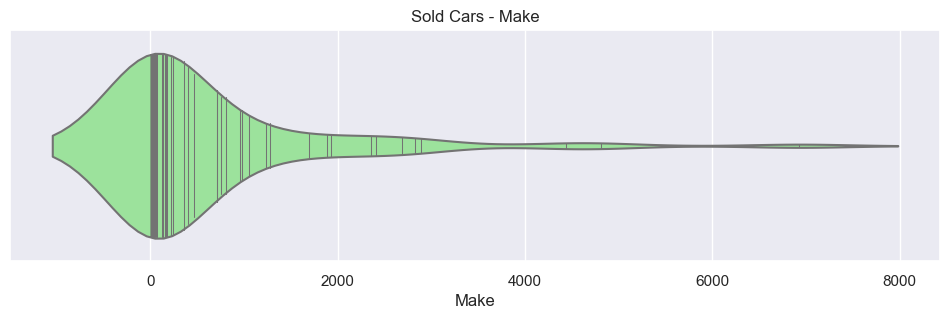

In [30]:
plt.figure(figsize=(12,3))
sns.violinplot(data=df01,x=df01["make"].value_counts(),inner="stick",color="lightgreen")
plt.xlabel("Make")
plt.title("Sold Cars - Make")

Text(0.5, 1.0, 'Sold Cars - Car Age')

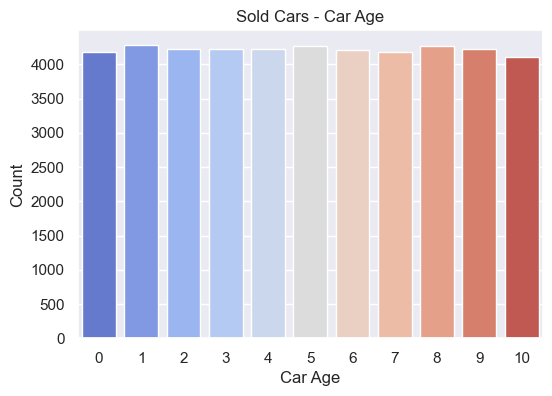

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(data=df01, x="carAge", palette="coolwarm")
plt.xlabel("Car Age")
plt.ylabel("Count")
plt.title("Sold Cars - Car Age")

Text(0.5, 1.0, 'Sold Cars - Gear')

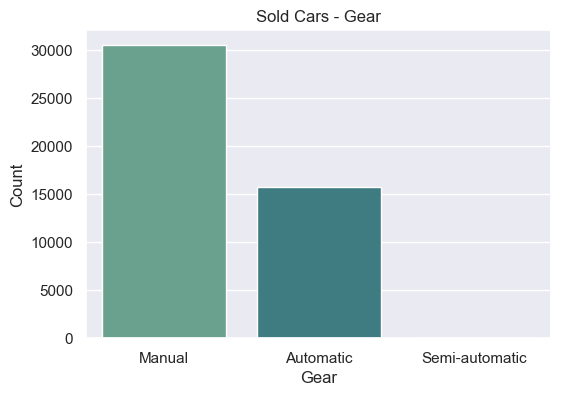

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(data=df01, x="gear", palette="crest")
plt.xlabel("Gear")
plt.ylabel("Count")
plt.title("Sold Cars - Gear")

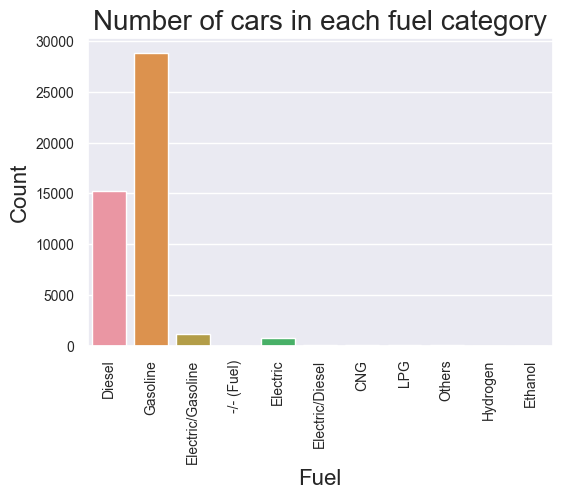

In [33]:
plt.figure(figsize=(6,4))

sns.countplot(data=df01, x="fuel")

plt.xlabel('Fuel', fontsize=16);
plt.ylabel('Count', fontsize=16);
plt.title('Number of cars in each fuel category', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=90)
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Used'),
  Text(1, 0, 'Demonstration'),
  Text(2, 0, "Employee's car"),
  Text(3, 0, 'Pre-registered'),
  Text(4, 0, 'New')])

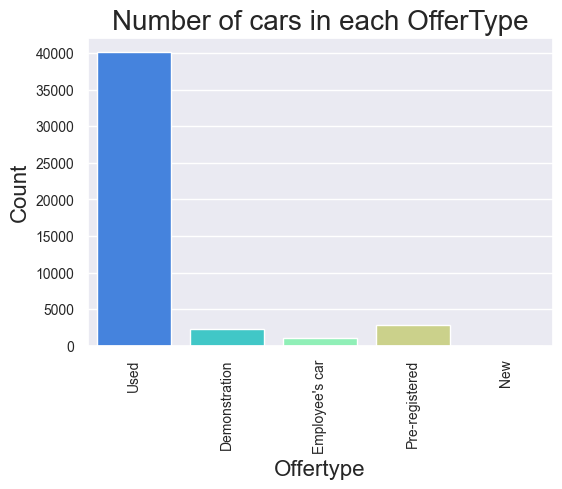

In [34]:
plt.figure(figsize=(6,4))

sns.countplot(data=df01, x="offerType", palette="rainbow")

plt.xlabel('Offertype', fontsize=16);
plt.ylabel('Count', fontsize=16);
plt.title('Number of cars in each OfferType', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=90)

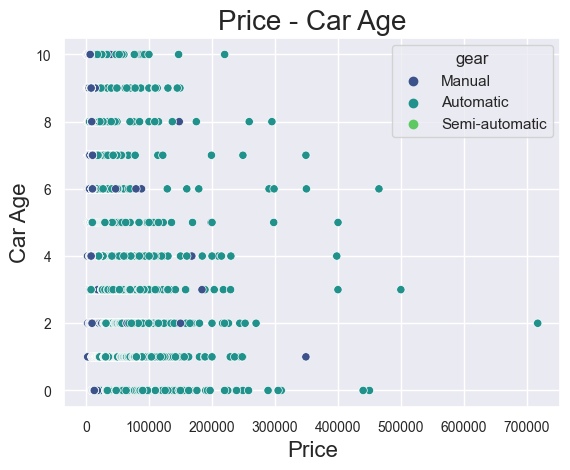

In [35]:
sns.scatterplot(data=df01,y="carAge",x="price", hue="gear", palette= "viridis")
plt.xlabel('Price', fontsize=16);
plt.ylabel('Car Age', fontsize=16);
plt.title('Price - Car Age', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=10)

In [36]:
# export dataframe for visualizations in Tableau
#df01.to_csv("autoscout24_visualisierung.csv",index=False)

# categorical values

In [37]:
# Label-Encoder

In [38]:
# transform the one-dimensional arrays of the features "make", "model", "fuel", "gear", "offerType" and "year" 
# into lists:

#MAKE
liste_make = []

arr01 = np.array(df01["make"])

for i in arr01:
    liste_make.append(i)
        
print(len(liste_make))

46370


In [39]:
#MODEL
liste_model = []

arr02 = np.array(df01["model"])

for i in arr02:
    liste_model.append(i)
        
print(len(liste_model))

46370


In [40]:
#FUEL
liste_fuel = []

arr03 = np.array(df01["fuel"])

for i in arr03:
        liste_fuel.append(i)
        
print(len(liste_fuel))

46370


In [41]:
#GEAR
liste_gear = []

arr04 = np.array(df01["gear"])

for i in arr04:
        liste_gear.append(i)
        
print(len(liste_gear))

46370


In [42]:
#OFFERTYPE
liste_offerType = []

arr05 = np.array(df01["offerType"])

for i in arr05:
        liste_offerType.append(i)
        
print(len(liste_offerType))

46370


In [43]:
# CONVERTING FEATURES: import, initialize and fit/transform in one step: 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# fit --> creating unique values
# transform --> converting numeric values

encoded_make = le.fit_transform(liste_make)

encoded_model = le.fit_transform(liste_model)

encoded_fuel = le.fit_transform(liste_fuel)

encoded_gear = le.fit_transform(liste_gear)

encoded_offerType = le.fit_transform(liste_offerType)


In [44]:
# filling the new features with numerical values

df01["encoded_make"] = encoded_make
df01["encoded_model"] = encoded_model
df01["encoded_fuel"] = encoded_fuel
df01["encoded_gear"] = encoded_gear
df01["encoded_offerType"] = encoded_offerType

In [45]:
df01.head()

,mileage,make,model,fuel,gear,offerType,price,hp,carAge,encoded_make,encoded_model,encoded_fuel,encoded_gear,encoded_offerType
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,10,8,33,2,1,4
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,10,72,396,7,1,4
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,10,63,324,7,1,4
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,10,61,508,7,1,4
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,10,56,32,7,1,4


In [46]:
df01.describe()

,mileage,price,hp,carAge,encoded_make,encoded_model,encoded_fuel,encoded_gear,encoded_offerType
count,46370.000000,46370.000000,46370.000000,46370.000000,46370.000000,46370.000000,46370.000000,46370.000000,46370.000000
mean,71152.333146,16549.427367,132.989648,4.987492,47.120832,420.340802,5.228639,0.660988,3.663468
std,62268.411408,18510.702873,75.385055,3.154988,21.620313,255.886540,2.363129,0.475924,0.989708
min,0.000000,1100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19837.750000,7490.000000,86.000000,2.000000,29.000000,184.000000,2.000000,0.000000,4.000000
50%,60000.000000,10999.000000,116.000000,5.000000,54.000000,401.000000,7.000000,1.000000,4.000000
75%,105000.000000,19490.000000,150.000000,8.000000,64.000000,637.000000,7.000000,1.000000,4.000000
max,699000.000000,717078.000000,850.000000,10.000000,75.000000,839.000000,10.000000,2.000000,4.000000


# correlations

In [47]:
corr = df01.corr(numeric_only=True)
corr

,mileage,price,hp,carAge,encoded_make,encoded_model,encoded_fuel,encoded_gear,encoded_offerType
mileage,1.000000,-0.315705,-0.014821,0.679991,-0.018055,-0.061605,-0.385329,0.088951,0.354155
price,-0.315705,1.000000,0.768742,-0.422631,-0.125835,0.032392,-0.084240,-0.448837,-0.276315
hp,-0.014821,0.768742,1.000000,-0.167375,-0.230519,-0.022735,-0.193923,-0.528100,-0.107548
carAge,0.679991,-0.422631,-0.167375,1.000000,0.016232,-0.036476,-0.067132,0.235296,0.465645
encoded_make,-0.018055,-0.125835,-0.230519,0.016232,1.000000,0.300344,0.062236,0.071128,0.007280
encoded_model,-0.061605,0.032392,-0.022735,-0.036476,0.300344,1.000000,-0.002338,-0.054958,-0.028605
encoded_fuel,-0.385329,-0.084240,-0.193923,-0.067132,0.062236,-0.002338,1.000000,0.248442,-0.055401
encoded_gear,0.088951,-0.448837,-0.528100,0.235296,0.071128,-0.054958,0.248442,1.000000,0.124615
encoded_offerType,0.354155,-0.276315,-0.107548,0.465645,0.007280,-0.028605,-0.055401,0.124615,1.000000


<Axes: >

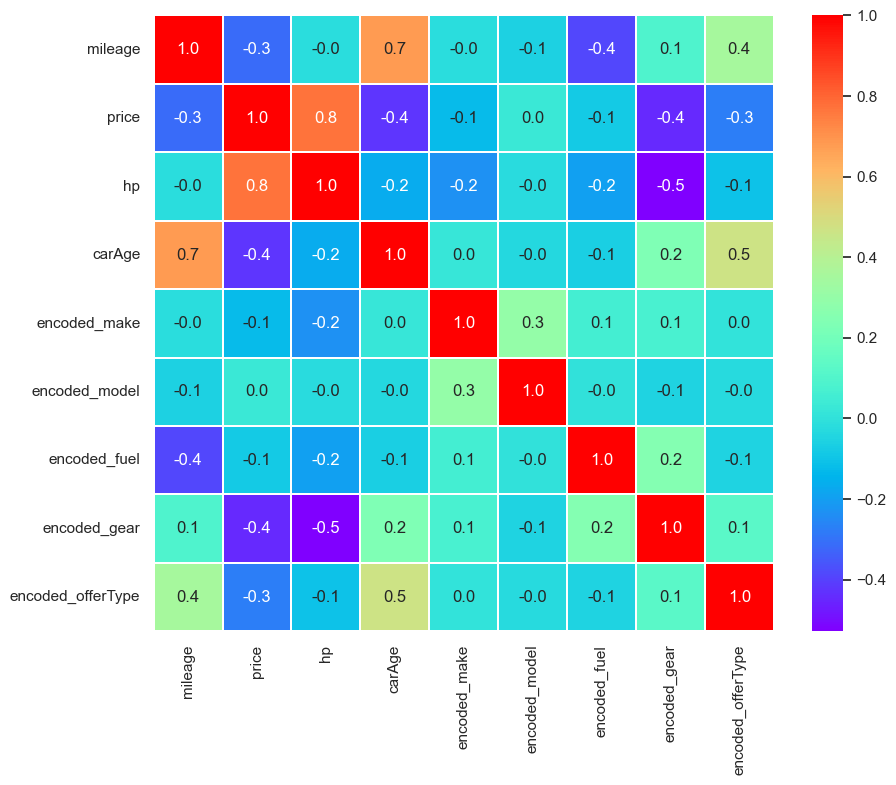

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="rainbow",linewidths=0.1,fmt=".1f",annot=True)

In [49]:
# THE MOST IMPORTANT CORRELATIONS:

# CORRELATION 0.8:
# price  -   hp

# CORRELATION 0.7:
# carAge  -  mileage

# CORRELATION 0.5:
# carAge - offerType

# CORRELATION 0.4:
# encoded_offerType - mileage

# CORRELATION 0.3:
# encoded_mark - encoded_model

# CORRELATION -0.5:
# encoded_gear  -   hp

# CORRELATION -0.4:
# encoded_fuel   -   mileage
# encoded_gear   -   price
# price  -   carAge

# CORRELATION -0.3:
# encoded_offerType  -   price
# mileage  -  price

In [50]:
# export dataframe for visualizations in Tableau
#df01.to_csv("autoscout24_numerisch.csv",index=False)

In [51]:
df01.shape

(46370, 14)

# MACHINE LEARNING

# Category: Supervised Learning - numeric

In [52]:
# The 5 best-selling brands should be used for processing in machine learning

In [53]:
df01["make"].value_counts().head(5)

make
Volkswagen    6931
Opel          4808
Ford          4440
Skoda         2888
Renault       2829
Name: count, dtype: int64

In [54]:
df01 = df01[(df01["make"]  == "Volkswagen") | (df01["make"]  == "Opel") | (df01["make"]  == "Ford")
           | (df01["make"]  == "Skoda") | (df01["make"]  == "Renault")] 

In [55]:
df01.sample(5)

,mileage,make,model,fuel,gear,offerType,price,hp,carAge,encoded_make,encoded_model,encoded_fuel,encoded_gear,encoded_offerType
31756,240700,Skoda,Yeti,Diesel,Manual,Used,5999,110.0,9,64,812,2,1,4
6230,148000,Ford,Focus,Diesel,Manual,Used,7250,105.0,5,29,338,2,1,4
3920,89440,Skoda,Fabia,Diesel,Manual,Used,9975,90.0,4,64,333,2,1,4
8805,29986,Ford,Fiesta,Gasoline,Manual,Used,8840,71.0,2,29,334,7,1,4
14354,6532,Renault,Twingo,Gasoline,Manual,Demonstration,9899,73.0,0,61,750,7,1,0


In [56]:
df01.shape

(21896, 14)

In [57]:
df01["make"].value_counts().head(5).sum()

21896

In [58]:
# AVERAGE PRICE BY BRAND:

vw = df01[(df01["make"]  == "Volkswagen")]
opel = df01[(df01["make"]  == "Opel")]
ford = df01[(df01["make"]  == "Ford")]
skoda = df01[(df01["make"]  == "Skoda")]
renault = df01[(df01["make"]  == "Renault")]

In [59]:
print("Average Price Volkswagen:",vw["price"].mean().round(0))
print("Average Price Opel:      ",opel["price"].mean().round(0))
print("Average Price Ford:      ",ford["price"].mean().round(0))
print("Average Price Skoda:     ",skoda["price"].mean().round(0))
print("Average Price Renault:   ",renault["price"].mean().round(0))

Average Price Volkswagen: 16066.0
Average Price Opel:       10444.0
Average Price Ford:       13795.0
Average Price Skoda:      13726.0
Average Price Renault:    11287.0


# Algorithms

In [60]:
# NUMERIC PREDICTION ALGORITHMS:
    
Linear Regression
Decision Tree
Randorm Forest

In [61]:
# VARIABLES FOR TRAINING UND PREDICTION

X01 = df01.drop(["make", "model", "fuel", "gear", "offerType", "price"], axis=1)
y01 = df01["price"]

# X01 = df02.drop(df02.iloc[::, 1:7]), axis = 1)

In [62]:
#8 FEATURES - 21.896 SAMPLES

X01.shape

(21896, 8)

In [63]:
#TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X01, y01, test_size = 0.20, random_state = 101)

In [64]:
# StandardScaler by using LinearRegression, DecisionTree and RandomForest not recommended

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lin = LinearRegression()
dec = DecisionTreeRegressor()
rfc = RandomForestRegressor()

In [65]:
# TRAIN

lin01 = lin.fit(X_train, y_train)
dec01 = DecisionTreeRegressor(random_state = 101).fit(X_train, y_train)
rfc01 = RandomForestRegressor(random_state = 101, n_estimators = 1000).fit(X_train, y_train)

In [66]:
# PREDICT

pred_lin01 = lin01.predict(X_test)
pred_dec01 = dec01.predict(X_test)
pred_rfc01 = rfc01.predict(X_test)

# Evaluation 

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
# CHECK - SAMPLES 

df01.sample(5, random_state=80)

,mileage,make,model,fuel,gear,offerType,price,hp,carAge,encoded_make,encoded_model,encoded_fuel,encoded_gear,encoded_offerType
36302,70000,Skoda,Roomster,Gasoline,Automatic,Used,9890,105.0,8,64,629,7,0,4
45227,10000,Volkswagen,Golf,Gasoline,Manual,Demonstration,28890,150.0,1,72,396,7,1,0
12840,20,Renault,Kangoo,Gasoline,Automatic,Used,15070,114.0,2,61,452,7,0,4
21304,15750,Volkswagen,Caddy,Diesel,Automatic,Demonstration,28750,150.0,1,72,219,2,0,0
9209,16551,Volkswagen,Polo,Gasoline,Manual,Used,11944,65.0,3,72,566,7,1,4


In [71]:
print("Real Price Skoda Roomster: 9890\n")
print("Prediction Linear Regression:  ",lin01.predict([[70000, 105, 8, 64, 629, 7, 0, 4]]).round(0))
print("Prediction Decision Tree:      ", dec01.predict([[70000, 105, 8, 64, 629, 7, 0, 4]]).round(0))
print("Prediction Random Forest:      ", rfc01.predict([[70000, 105, 8, 64, 629, 7, 0, 4]]).round(0))

Real Price Skoda Roomster: 9890

Prediction Linear Regression:   [10608.]
Prediction Decision Tree:       [9890.]
Prediction Random Forest:       [9684.]


In [72]:
print("Real Price Volkswagen Golf: 28890\n")
print("Prediction Linear Regression:  ",lin01.predict([[10000, 150.0, 1, 72, 396, 7, 1, 0]]).round(0))
print("Prediction Decision Tree:      ", dec01.predict([[10000, 150.0, 1, 72, 396, 7, 1, 0]]).round(0))
print("Prediction Random Forest:      ", rfc01.predict([[10000, 150.0, 1, 72, 396, 7, 1, 0]]).round(0))

Real Price Volkswagen Golf: 28890

Prediction Linear Regression:   [27177.]
Prediction Decision Tree:       [28890.]
Prediction Random Forest:       [28747.]


In [73]:
print("Real Price Renault Kango: 15070\n")
print("Prediction Linear Regression:  ",lin01.predict([[20, 114.0, 2, 61, 452, 7, 0, 4]]).round(0))
print("Prediction Decision Tree:      ", dec01.predict([[20, 114.0, 2, 61, 452, 7, 0, 4]]).round(0))
print("Prediction Random Forest:      ", rfc01.predict([[20, 114.0, 2, 61, 452, 7, 0, 4]]).round(0))

Real Price Renault Kango: 15070

Prediction Linear Regression:   [19622.]
Prediction Decision Tree:       [14917.]
Prediction Random Forest:       [15062.]


In [74]:
print("Real Price Volkswagen Caddy: 28750\n")
print("Prediction Linear Regression:  ",lin01.predict([[15750, 150.0, 1, 72, 219, 2, 0, 0]]).round(0))
print("Prediction Decision Tree:      ", dec01.predict([[15750, 150.0, 1, 72, 219, 2, 0, 0]]).round(0))
print("Prediction Random Forest:      ", rfc01.predict([[15750, 150.0, 1, 72, 219, 2, 0, 0]]).round(0))

Real Price Volkswagen Caddy: 28750

Prediction Linear Regression:   [30356.]
Prediction Decision Tree:       [28950.]
Prediction Random Forest:       [29576.]


In [75]:
print("Real Price Volkswagen Polo: 11944\n")
print("Prediction Linear Regression:  ",lin01.predict([[16551, 65.0, 3, 72, 566, 7, 1, 4]]).round(0))
print("Prediction Decision Tree:      ", dec01.predict([[16551, 65.0, 3, 72, 566, 7, 1, 4]]).round(0))
print("Prediction Random Forest:      ", rfc01.predict([[16551, 65.0, 3, 72, 566, 7, 1, 4]]).round(0))

Real Price Volkswagen Polo: 11944

Prediction Linear Regression:   [11484.]
Prediction Decision Tree:       [11944.]
Prediction Random Forest:       [11469.]


In [76]:
# METRICS

from sklearn import metrics
print("LINEAR REGRESSION:")
print("Mean absolute error:", metrics.mean_absolute_error(y_test, pred_lin01).round(2))             
print("Mean squared error :", metrics.mean_squared_error(y_test, pred_lin01).round(2))                
print("Root squared error :", np.sqrt(metrics.mean_squared_error(y_test, pred_lin01)).round(2)) 
print()
print("DECISION TREE:")
print("Mean absolute error:", metrics.mean_absolute_error(y_test, pred_dec01).round(2))             
print("Mean squared error :", metrics.mean_squared_error(y_test, pred_dec01).round(2))                
print("Root squared error :", np.sqrt(metrics.mean_squared_error(y_test, pred_dec01)).round(2))     
print()
print("RANDOM FOREST:")
print("Mean absolute error:", metrics.mean_absolute_error(y_test, pred_rfc01).round(2))             
print("Mean squared error :", metrics.mean_squared_error(y_test, pred_rfc01).round(2))                
print("Root squared error :", np.sqrt(metrics.mean_squared_error(y_test, pred_rfc01)).round(2))     

LINEAR REGRESSION:
Mean absolute error: 2717.49
Mean squared error : 18209427.83
Root squared error : 4267.25

DECISION TREE:
Mean absolute error: 1678.54
Mean squared error : 10189065.05
Root squared error : 3192.03

RANDOM FOREST:
Mean absolute error: 1328.13
Mean squared error : 6113752.53
Root squared error : 2472.6


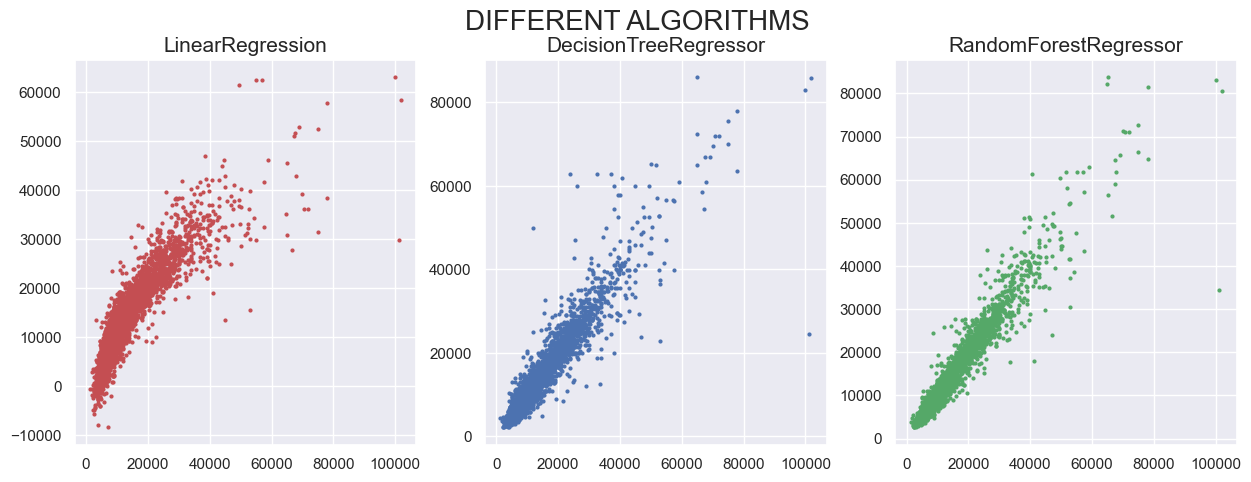

In [77]:
# VISUALISATIONS

fig, (ax1, ax2, ax3)  = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax1.scatter(y_test,pred_lin01, c= "r", s=4)
ax1.set_title("LinearRegression", fontsize = 15)
ax2.scatter(y_test,pred_dec01, c= "b", s=4)
ax2.set_title('DecisionTreeRegressor', fontsize = 15)
ax3.scatter(y_test,pred_rfc01, c= "g", s=4)
ax3.set_title('RandomForestRegressor', fontsize = 15)

fig.suptitle('DIFFERENT ALGORITHMS', fontsize = 20)
plt.show()

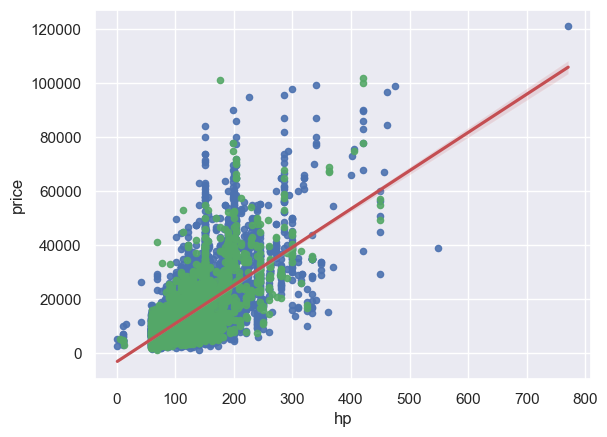

In [78]:
# comparison: feature with a strange correlation "hp" with label "price"
# regression line in red

plt.scatter(X_train["hp"],y_train,color="b",alpha=0.9,s=20)
plt.scatter(X_test["hp"],y_test,color="g",alpha=0.9,s=20)
sns.regplot(x=df01["hp"], y=df01["price"], scatter=False, logx=False,color="r")
plt.show()

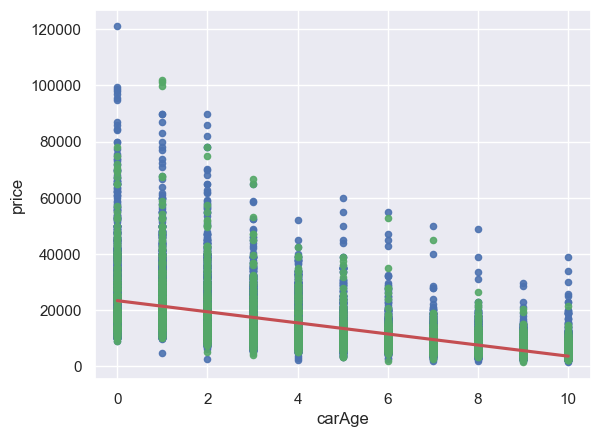

In [79]:
# comparison: feature with a strange correlation "carAge" with label "price"
# regression line in red

plt.scatter(X_train["carAge"],y_train,color="b",alpha=0.9,s=20)
plt.scatter(X_test["carAge"],y_test,color="g",alpha=0.9,s=20)
sns.regplot(x=df01["carAge"], y=df01["price"], scatter=False, logx=False,color="r")
plt.show()

In [80]:
# Conclusion: 
# Conclusion: The RandomForest regressor provides the most precise predictions and is the best in this comparison.
# But the results for DecisionTree are only slightly worse. 
# The LinearRegressor is the clear loser because its errors are almost twice as large as those of the RandomForest.

# PCA

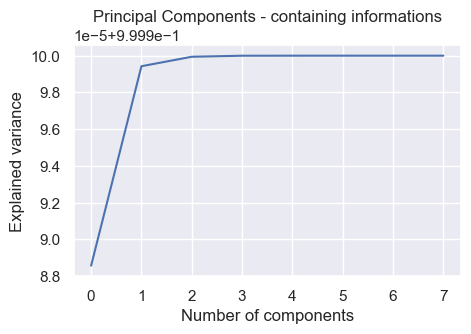

In [81]:
from sklearn.decomposition import PCA

plt.figure(figsize=(5, 3)) 

pca_check = PCA(n_components=8, random_state = 33)            
pca_check.fit(X01)                                             
plt.plot(np.cumsum(pca_check.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.title("Principal Components - containing informations")
plt.show()

In [82]:
#First component contains over 100 % of the information

for i,value in enumerate(pca_check.explained_variance_ratio_):
    print(f"{i+1}. Principal Component explains {value*100:.4f}% of the variance")

1. Principal Component explains 99.9989% of the variance
2. Principal Component explains 0.0011% of the variance
3. Principal Component explains 0.0001% of the variance
4. Principal Component explains 0.0000% of the variance
5. Principal Component explains 0.0000% of the variance
6. Principal Component explains 0.0000% of the variance
7. Principal Component explains 0.0000% of the variance
8. Principal Component explains 0.0000% of the variance


In [83]:
#Standardscaler:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X01 = scaler.fit_transform(X01)

In [84]:
# PCA with 1 component

pca = PCA(n_components=1, random_state=33)

In [85]:
# PCA: training and transforming:

x_pca = pca.fit_transform(scaled_X01)

In [86]:
x_pca.shape

(21896, 1)

# Algorithms with PCA

In [87]:
X02 = x_pca
y02 = df01["price"]

In [88]:
#1 FEATURE - 21.896 SAMPLES

X02.shape

(21896, 1)

In [89]:
y02.shape

(21896,)

In [90]:
#TRAIN TEST SPLIT

X_train02, X_test02, y_train02, y_test02 = train_test_split(X02, y02, test_size = 0.20, random_state = 101)

In [91]:
# TRAIN

lin02 = lin.fit(X_train02, y_train02)
dec02 = DecisionTreeRegressor(random_state = 101).fit(X_train02, y_train02)
rfc02 = RandomForestRegressor(random_state = 101, n_estimators = 1000).fit(X_train02, y_train02)

In [92]:

PREDICT

pred_lin02 = lin02.predict(X_test02)
pred_dec02 = dec02.predict(X_test02)
pred_rfc02 = rfc02.predict(X_test02)


In [93]:
# METRICS
from sklearn import metrics
print("LINEAR REGRESSION:")
print("Mean absolute error:", metrics.mean_absolute_error(y_test02, pred_lin02).round(2))             
print("Mean squared error :", metrics.mean_squared_error(y_test02, pred_lin02).round(2))                
print("Root squared error :", np.sqrt(metrics.mean_squared_error(y_test02, pred_lin02)).round(2)) 
print()
print("DECISION TREE:")
print("Mean absolute error:", metrics.mean_absolute_error(y_test02, pred_dec02).round(2))             
print("Mean squared error :", metrics.mean_squared_error(y_test02, pred_dec02).round(2))                
print("Root squared error :", np.sqrt(metrics.mean_squared_error(y_test02, pred_dec02)).round(2))     
print()
print("RANDOM FOREST:")
print("Mean absolute error:", metrics.mean_absolute_error(y_test02, pred_rfc02).round(2))             
print("Mean squared error :", metrics.mean_squared_error(y_test02, pred_rfc02).round(2))                
print("Root squared error :", np.sqrt(metrics.mean_squared_error(y_test02, pred_rfc02)).round(2))  

LINEAR REGRESSION:
Mean absolute error: 3994.61
Mean squared error : 38287795.64
Root squared error : 6187.71

DECISION TREE:
Mean absolute error: 4188.57
Mean squared error : 51074508.75
Root squared error : 7146.64

RANDOM FOREST:
Mean absolute error: 3749.91
Mean squared error : 38313257.57
Root squared error : 6189.77


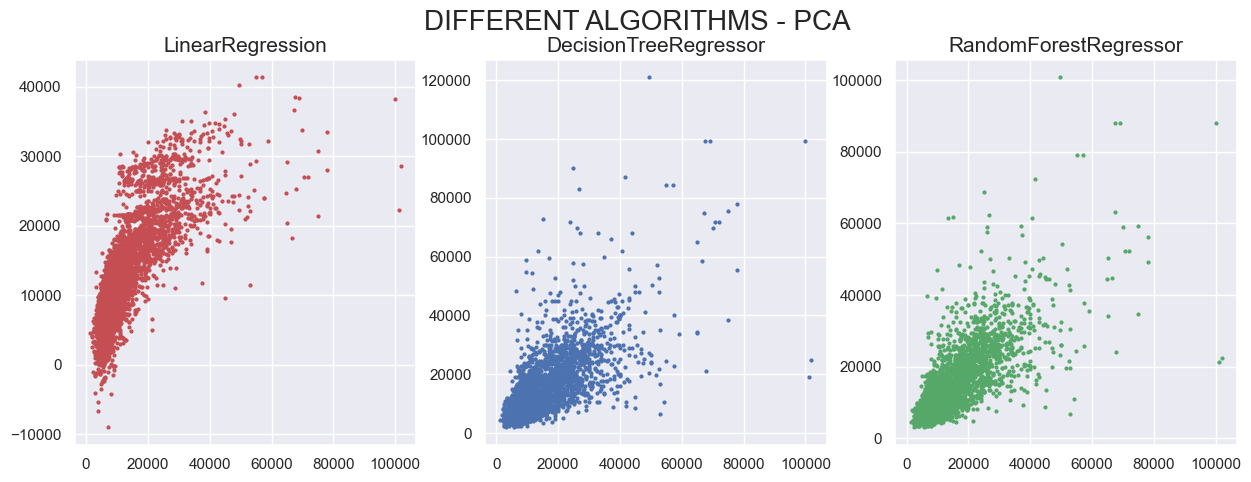

In [94]:
# VISUALISATIONS

fig, (ax1, ax2, ax3)  = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax1.scatter(y_test02,pred_lin02, c= "r", s=4)
ax1.set_title("LinearRegression", fontsize = 15)
ax2.scatter(y_test02,pred_dec02, c= "b", s=4)
ax2.set_title('DecisionTreeRegressor', fontsize = 15)
ax3.scatter(y_test02,pred_rfc02, c= "g", s=4)
ax3.set_title('RandomForestRegressor', fontsize = 15)

fig.suptitle('DIFFERENT ALGORITHMS - PCA', fontsize = 20)
plt.show()

In [95]:
# CONCLUSION:
# with PCA much worse results